## CAPSTONE PROJECT1 : Heart Failure Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib as plt
import warnings
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report , precision_score , recall_score,f1_score,roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart_failure_clinical_records1.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Performing EDA and knowing the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#sex , chestpaintype , resting ECG, exercise angina , ST_slope these are categorical data and all other numerical data.

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# observations  : 
1) Each column data is of different range , we need to standardise data using Standard scalar
2) min age of sample is 28 and max is 77. which feels right.
3) 70% data is in the range of 47 to 77 which is also same in real time, this age group has most chance of heart problems and health issues.
4) Resting BP :  there are some records having 0 , there seem to be some error with the data.
5) same with Cholesterol, some data is 0 seems error but will check values and confirm.
6) HeartDisease is our target variable.

now we will do individual variable EDA , convert categorical to numerical , treat outliers and other data treatment as preprocessing of data.

In [10]:
### checking null/missing values 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
dup = df[df.duplicated()]

In [12]:
dup

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [13]:
#there is no missing data & duplocate data.

In [14]:
cat_col = [fea for fea in df.columns if df[fea].dtypes=="object"]

In [15]:
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [16]:
num_col = [fea for fea in df.columns if df[fea].dtypes!="object"]

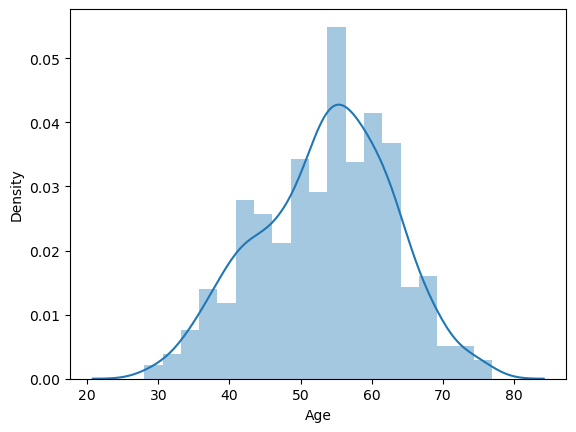

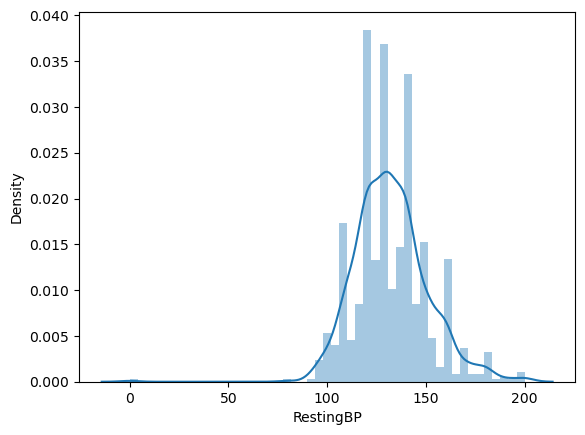

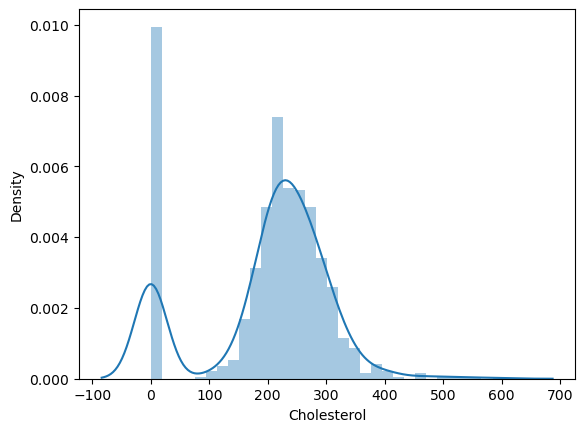

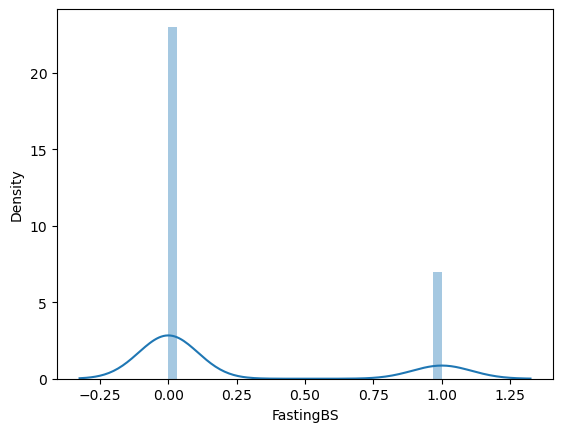

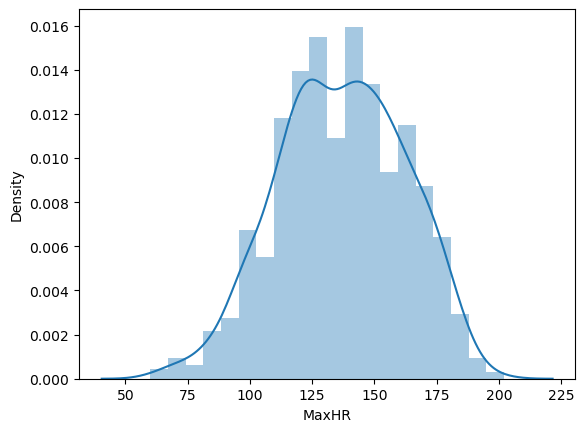

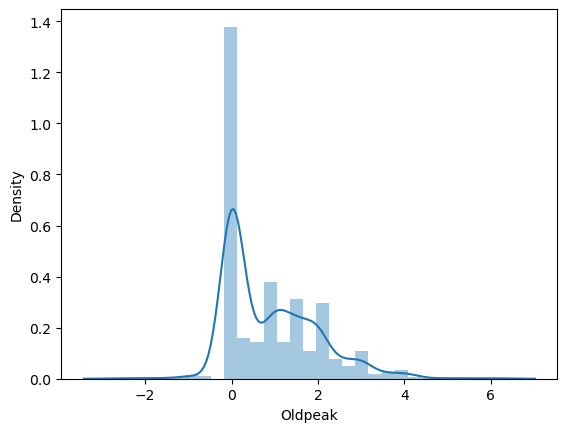

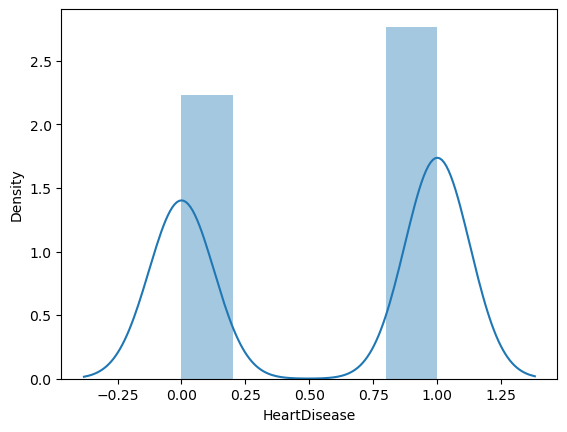

In [17]:
for col in num_col:
    sns.distplot(df[col])
    plt.show()

In [18]:
#fasting bs and old peak has many data having 0 value.

In [19]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [20]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [21]:
df["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [22]:
df["ExerciseAngina"].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [23]:
df["ST_Slope"].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [24]:
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

this is for Sex
Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
dtype: int64


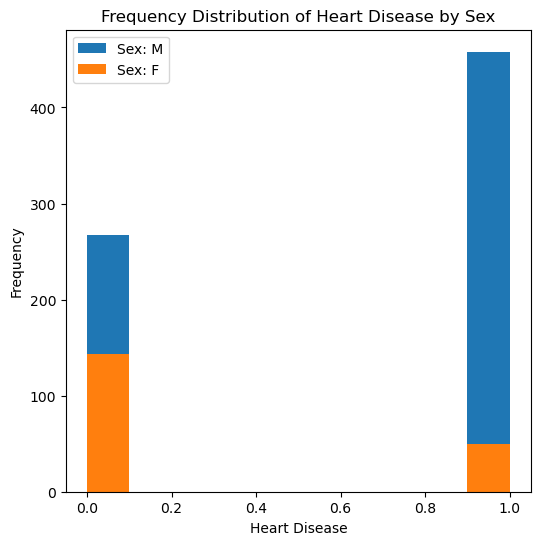

this is for ChestPainType
ChestPainType  HeartDisease
ASY            0               104
               1               392
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
dtype: int64


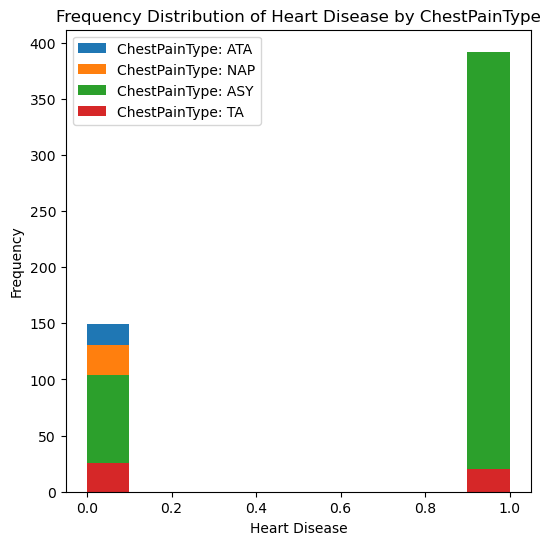

this is for RestingECG
RestingECG  HeartDisease
LVH         0                82
            1               106
Normal      0               267
            1               285
ST          0                61
            1               117
dtype: int64


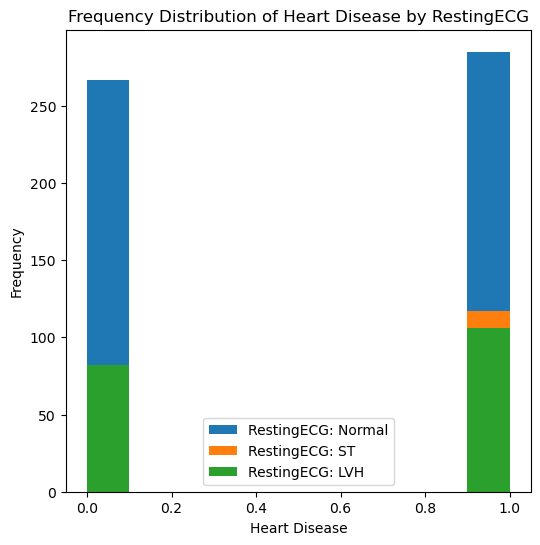

this is for ExerciseAngina
ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
dtype: int64


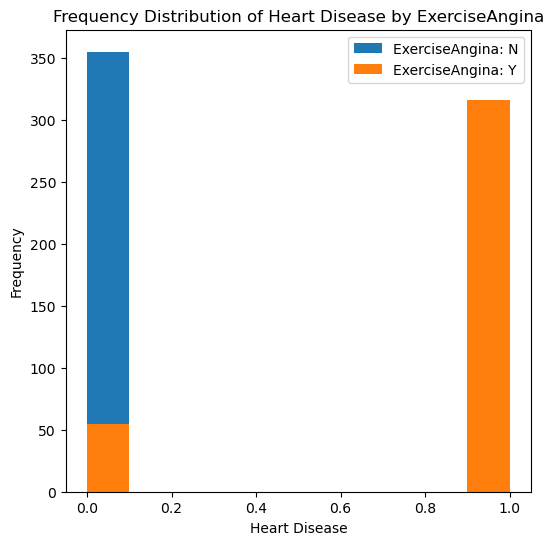

this is for ST_Slope
ST_Slope  HeartDisease
Down      0                14
          1                49
Flat      0                79
          1               381
Up        0               317
          1                78
dtype: int64


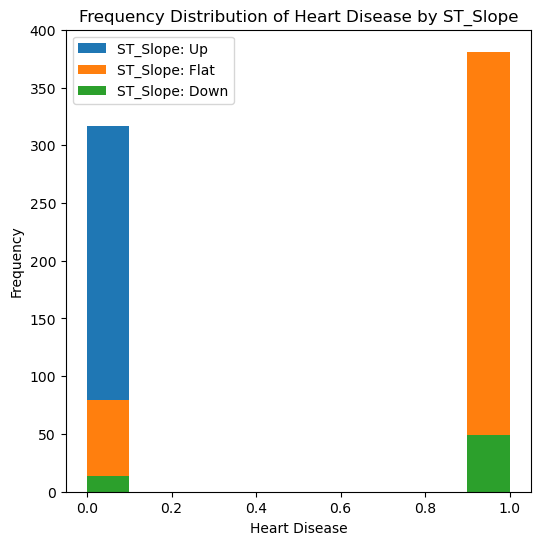

In [25]:
for i in cat_col:
    print("this is for",i)
    print(df.groupby([i, 'HeartDisease']).size())
    plt.figure(figsize=(6,6))
    for val in df[i].unique():
        plt.hist(df[df[i] == val]['HeartDisease'], label=f'{i}: {val}')
    plt.title(f'Frequency Distribution of Heart Disease by {i}')
    plt.xlabel('Heart Disease')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()    

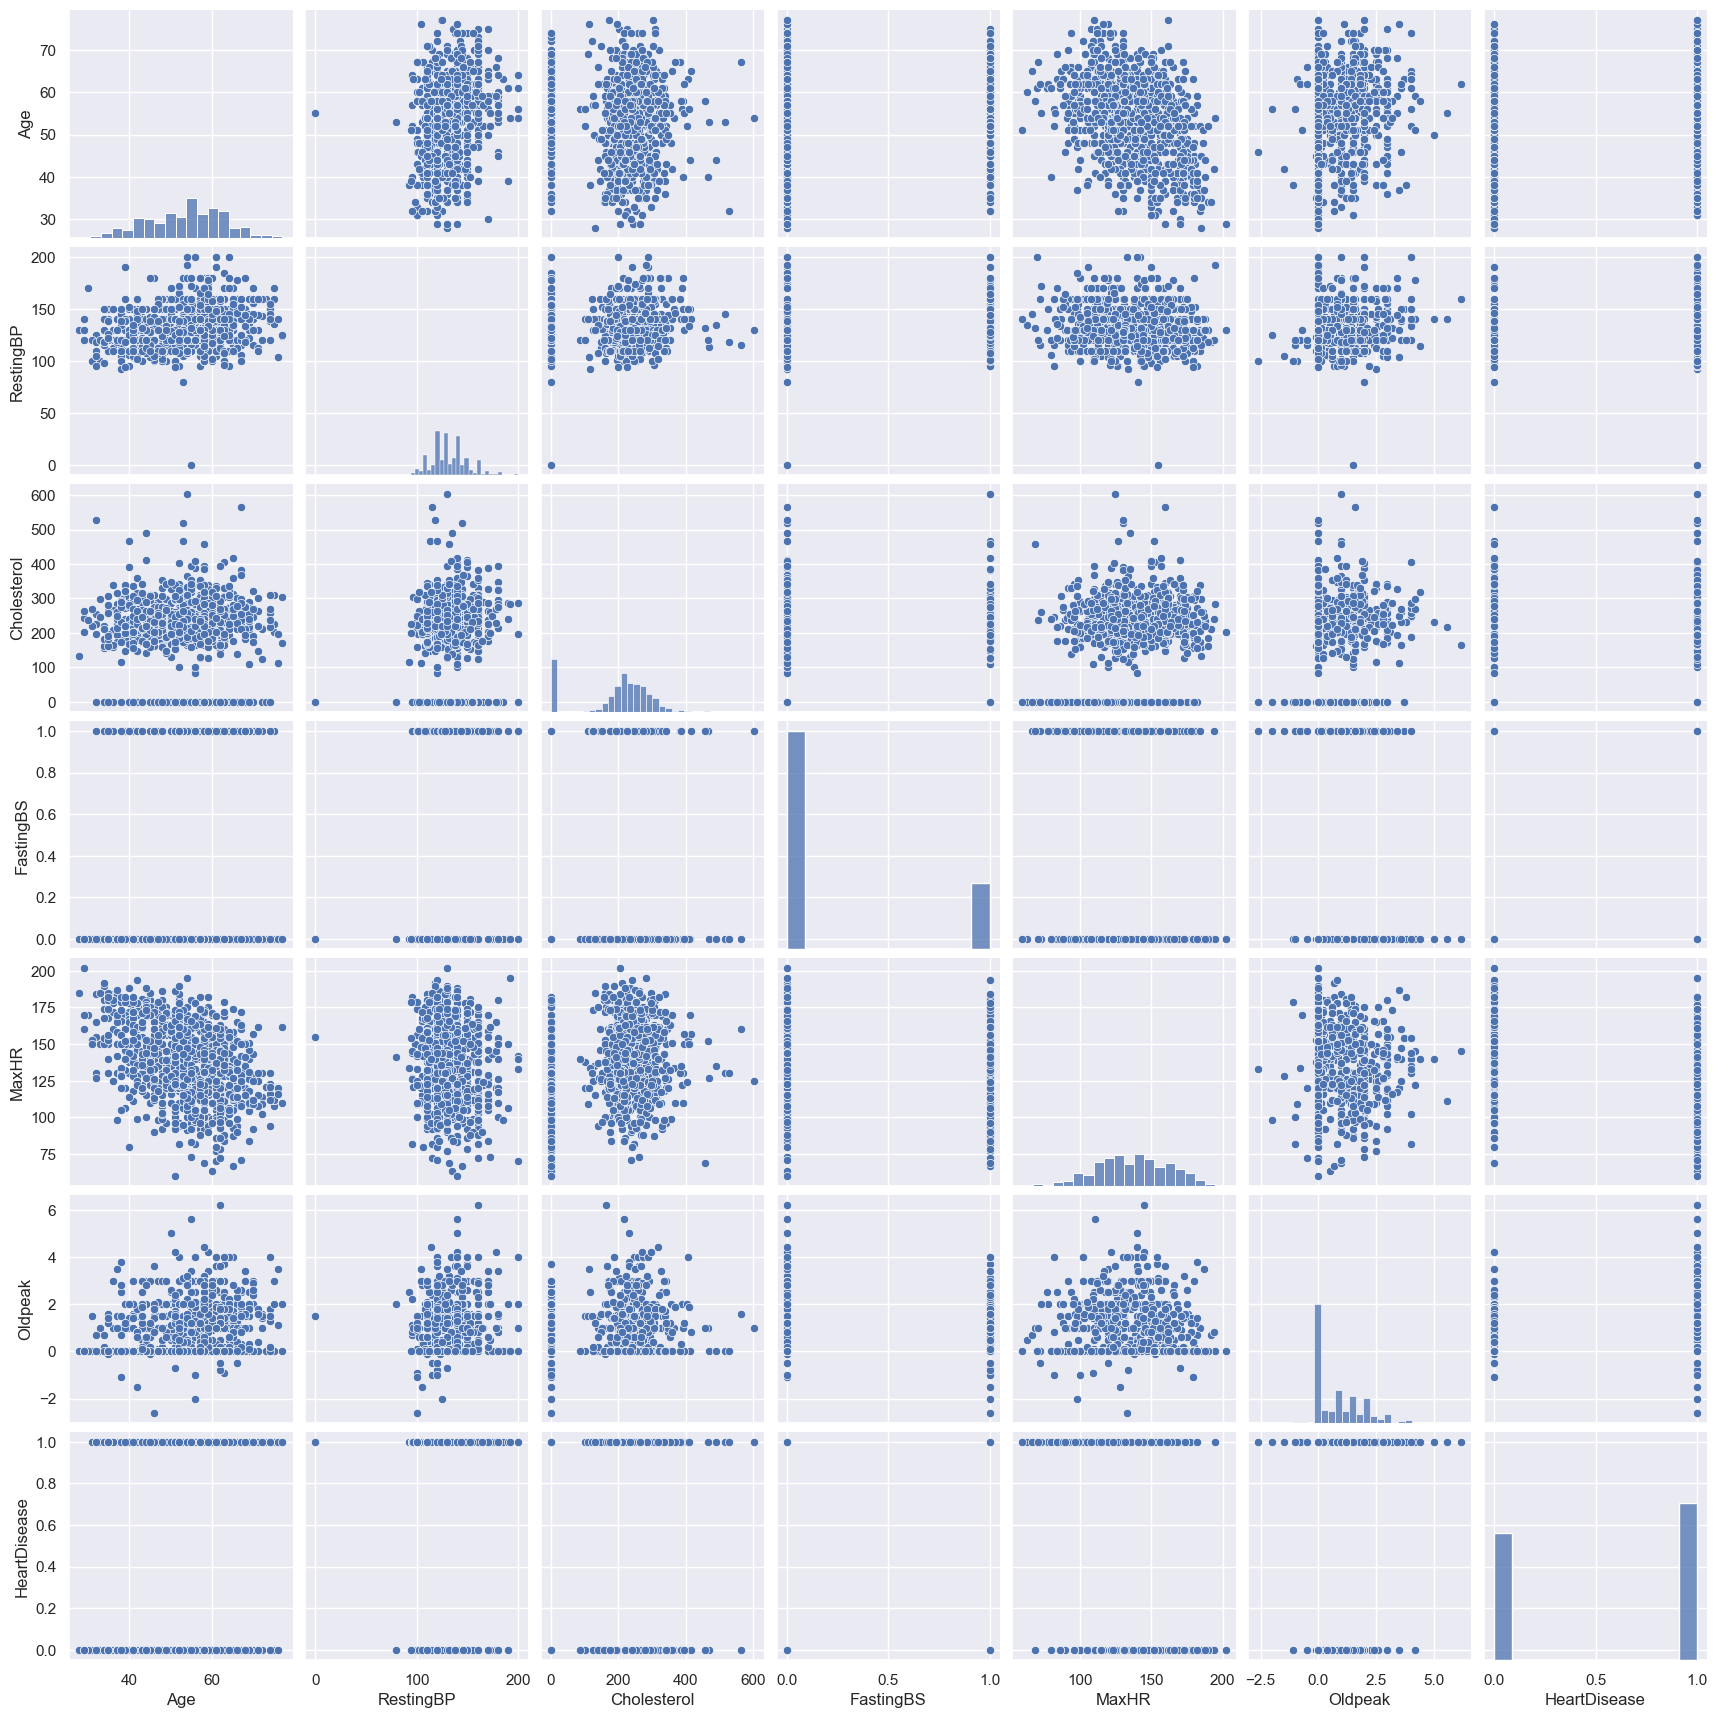

In [26]:

sns.set(rc={'figure.figsize':(25,25)})
sns.pairplot(df[num_col], height=2.5)

In [27]:
###outliers identificaiton and treatment

In [28]:
Q1=df["RestingBP"].quantile(0.25)
Q3=df["RestingBP"].quantile(0.75)

In [29]:
Q1

120.0

In [30]:
Q3

140.0

In [31]:
IQR = Q3-Q1

In [32]:
IQR

20.0

In [33]:
lower_limit_RP=Q1-1.5*IQR
upper_limit_RP = Q3+1.5*IQR

In [34]:
lower_limit_RP

90.0

In [35]:
upper_limit_RP

170.0

In [36]:
len(df['RestingBP'])-(len(df['RestingBP][df

SyntaxError: unterminated string literal (detected at line 1) (1762593754.py, line 1)

#will divide the data set into X and Y & then treat skewness and standardise data using standard scaler.

In [37]:
X=df.drop(columns=["HeartDisease"],axis=1)

In [38]:
Y=df["HeartDisease"]

In [39]:
print(X.shape)
print(Y.shape)

(918, 11)
(918,)


converting categorical data into numerical data

In [40]:
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [41]:
dummy_type_S = pd.get_dummies(X["Sex"],prefix="Gender",drop_first=True,dtype=int)

In [42]:
X=pd.concat([X,dummy_type_S],axis=1)
X.drop(columns=["Sex"],inplace=True)

In [43]:
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Gender_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,0


Treating Outliers

<Axes: >

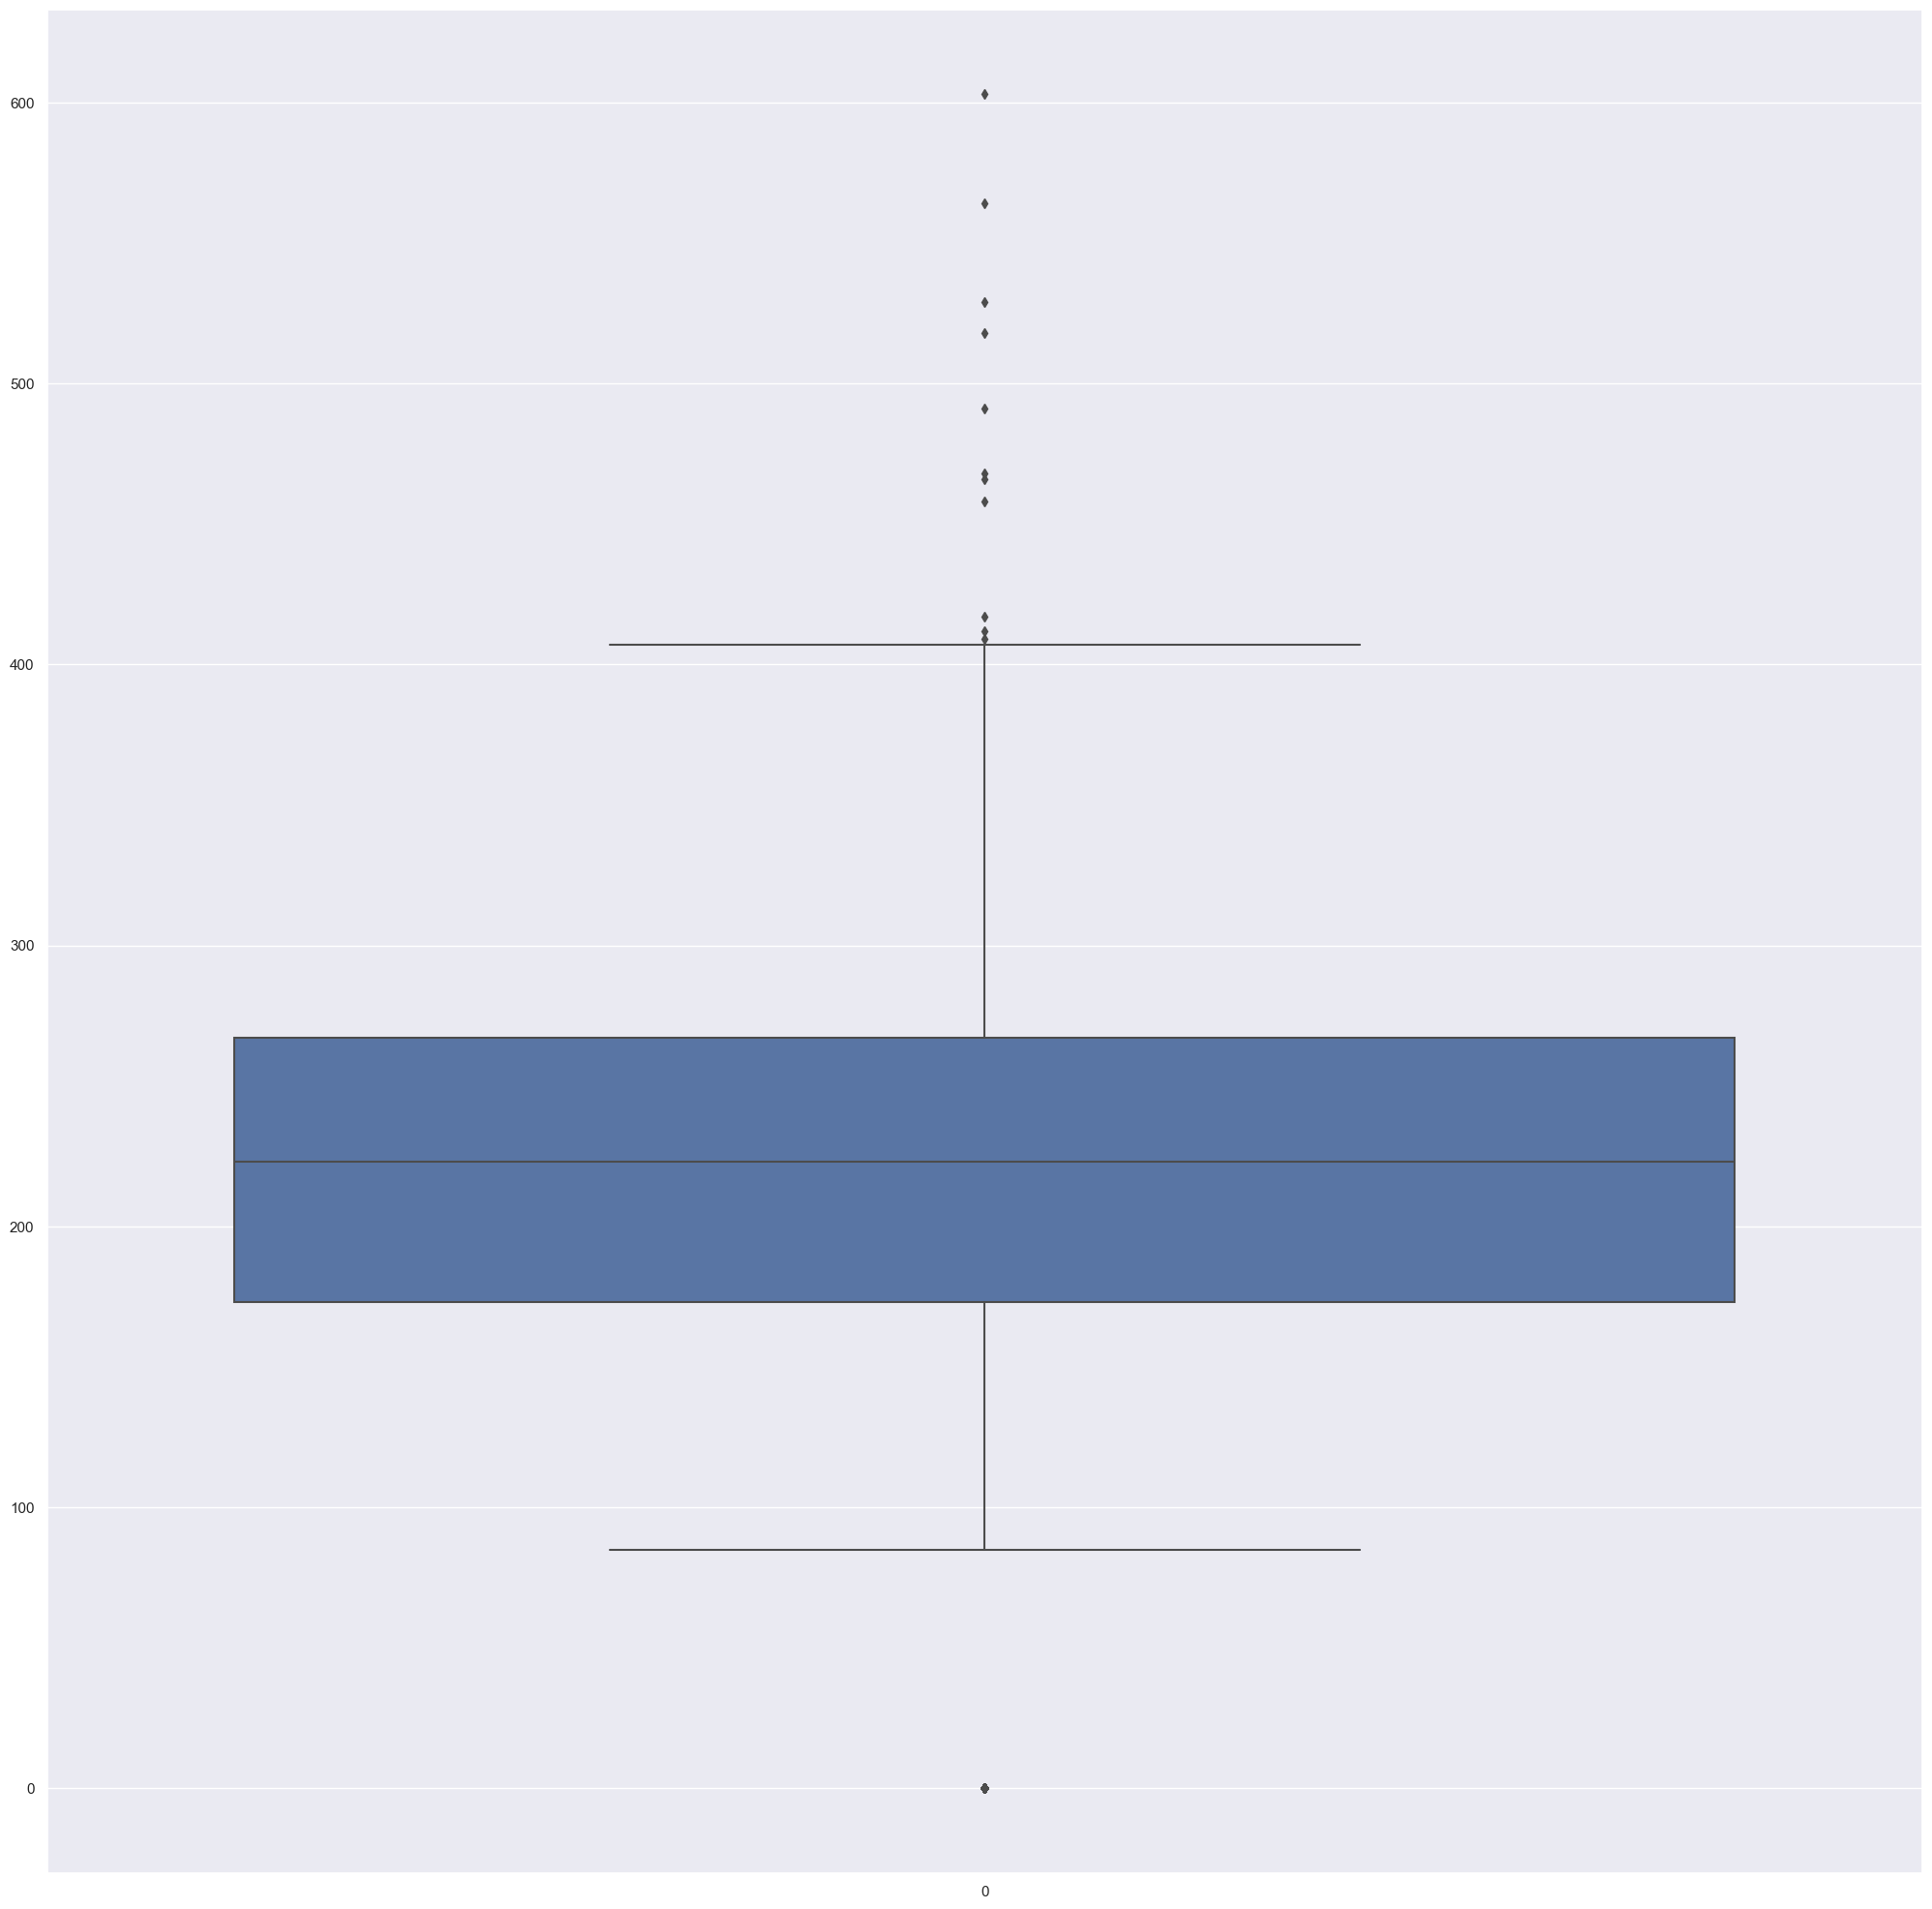

In [44]:
sns.boxplot(df["Cholesterol"])

<Axes: >

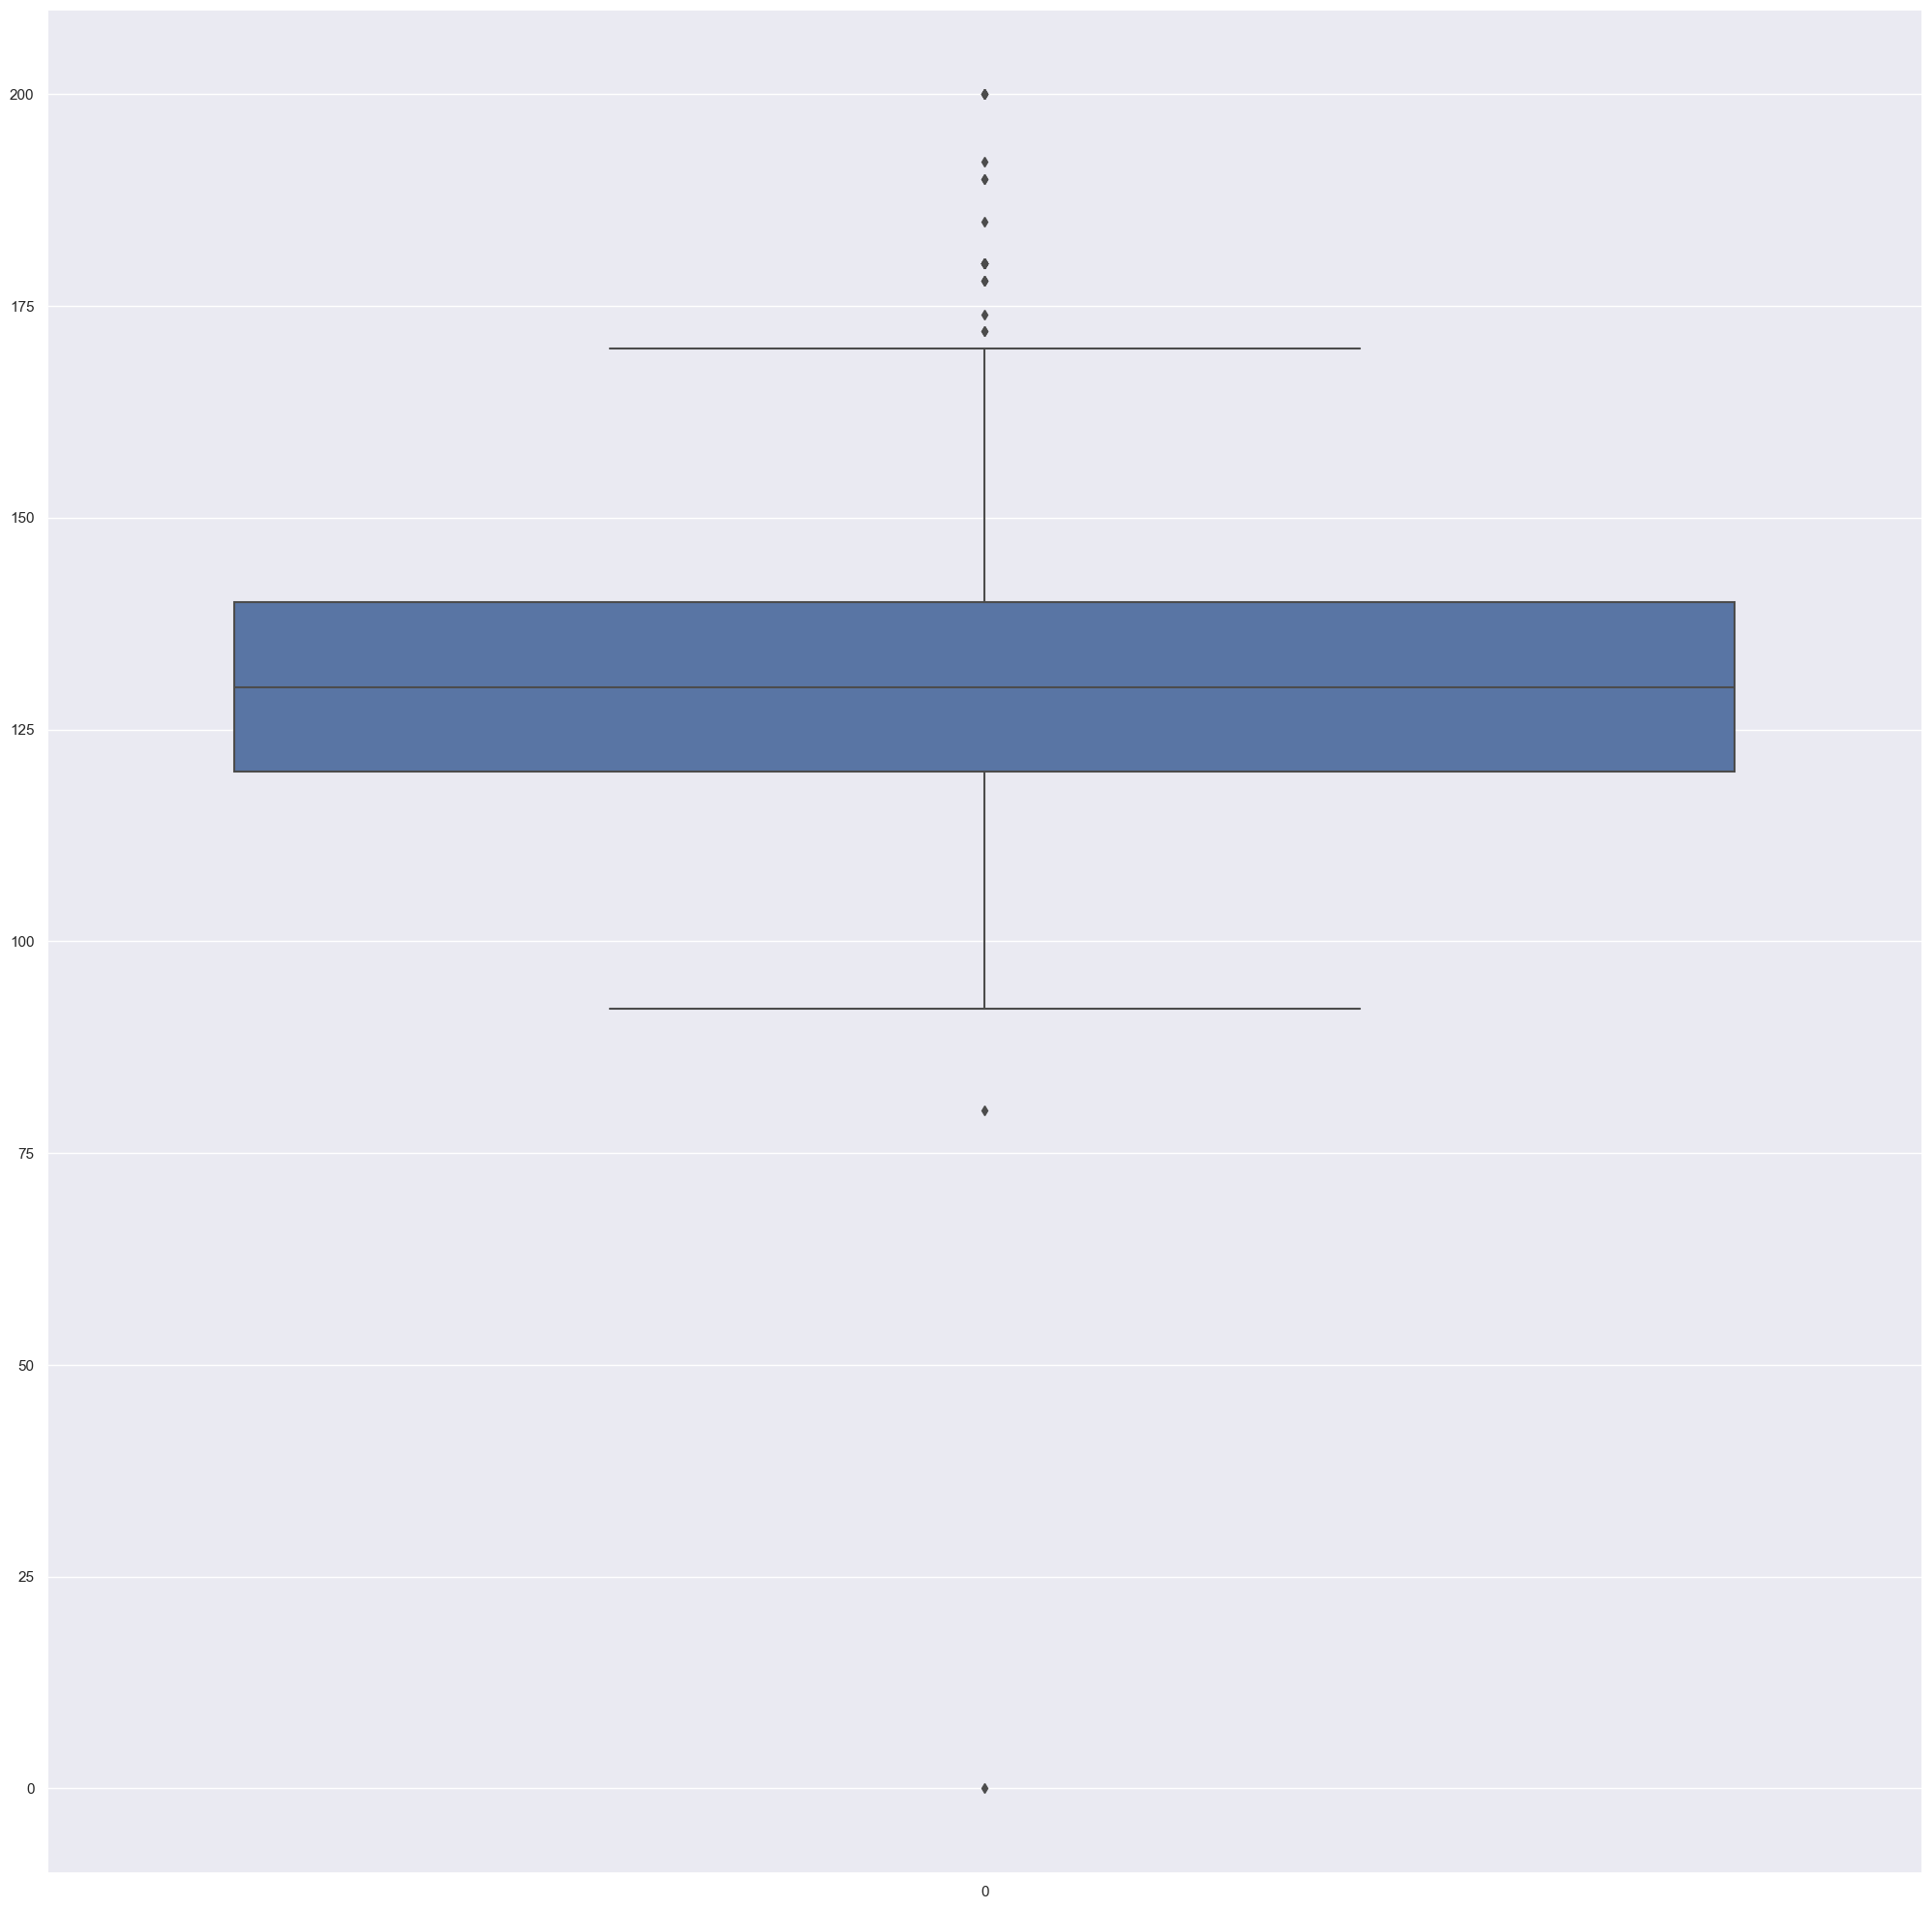

In [45]:
sns.boxplot(df["RestingBP"])

In [46]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [47]:
cat = [ 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in cat:
    X[col]=encoder.fit_transform(X[col])
    

In [48]:
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Gender_M
0,40,1,140,289,0,1,172,0,0.0,2,1
1,49,2,160,180,0,1,156,0,1.0,1,0
2,37,1,130,283,0,2,98,0,0.0,2,1
3,48,0,138,214,0,1,108,1,1.5,1,0
4,54,2,150,195,0,1,122,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,3,110,264,0,1,132,0,1.2,1,1
914,68,0,144,193,1,1,141,0,3.4,1,1
915,57,0,130,131,0,1,115,1,1.2,1,1
916,57,1,130,236,0,0,174,0,0.0,1,0


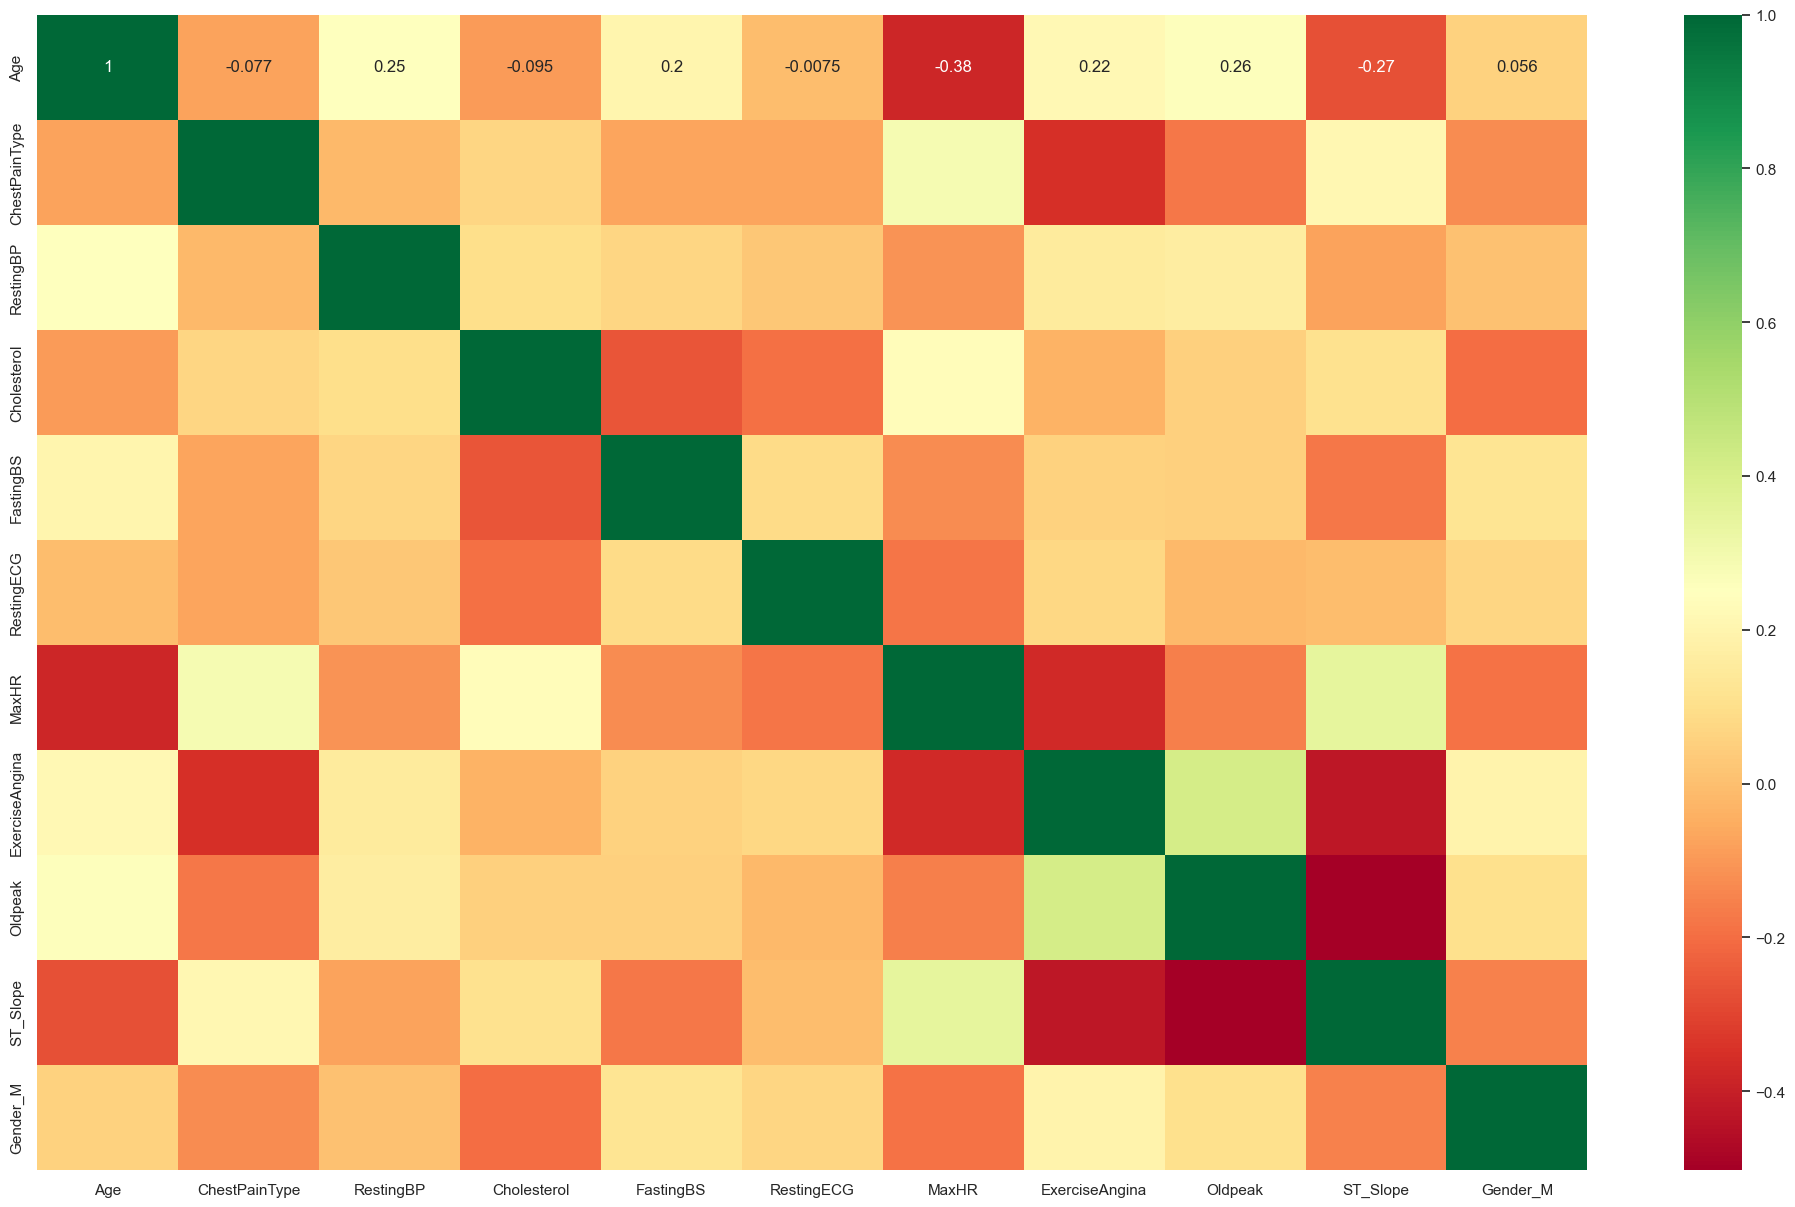

In [49]:
corr=X.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [50]:
#no variable seems to be highly correlated with any.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["variable"]=X.columns

In [53]:
vif

,VIF,variable
0,30.261977,Age
1,1.991361,ChestPainType
2,46.835556,RestingBP
3,5.227740,Cholesterol
4,1.482939,FastingBS
5,3.535198,RestingECG
6,26.142683,MaxHR
7,2.521587,ExerciseAngina
8,2.543331,Oldpeak
9,9.390390,ST_Slope


In [54]:
# there are variables having high vif , but we will remove data only if at last accuracy is not good.

In [55]:
# standardise data using standard scaler

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [57]:
X_train.shape

(688, 11)

In [58]:
X_test.shape

(230, 11)

In [59]:
Y_train.shape

(688,)

In [60]:
Y_test.shape

(230,)

In [61]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
lr=LogisticRegression()
lr

LogisticRegression()

In [64]:
lr_model = lr.fit(X_train_scaled,Y_train)
Y_pred_lr = lr_model.predict(X_test_scaled)

In [65]:
Y_pred_train = lr_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_lr)}")
cl_rp_lr= (classification_report(Y_test,Y_pred_lr))
print(cl_rp_lr)
cm_lr = confusion_matrix(Y_test,Y_pred_lr)
print(cm_lr)

Training accuracy : 0.8604651162790697
Testing accuracy  : 0.8608695652173913
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.90      0.85      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230

[[ 86  12]
 [ 20 112]]


observations: 
1) training and test accuracy doesnot has big difference
2) accuracy is not so good neither too bad. but we will try to improve the accuracy by using other models.

In [66]:
dt_model=DecisionTreeClassifier()
dt_model

DecisionTreeClassifier()

In [67]:
dt_model.fit(X_train_scaled,Y_train)
Y_pred_dt = dt_model.predict(X_test_scaled)

In [68]:
Y_pred_train_dt = dt_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_dt)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_dt)}")
cl_rp_dt= (classification_report(Y_test,Y_pred_dt))
print(cl_rp_dt)
cm_dt = confusion_matrix(Y_test,Y_pred_dt)
print(cm_dt)

Training accuracy : 1.0
Testing accuracy  : 0.7869565217391304
              precision    recall  f1-score   support

           0       0.71      0.86      0.77        98
           1       0.87      0.73      0.80       132

    accuracy                           0.79       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.80      0.79      0.79       230

[[84 14]
 [35 97]]


observation: 
1) there is high difference in training and testing accuracy . it seems to be a clear case of overfitting. we will try to tune it using hyperparameter tuning.

In [69]:
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 

[Text(0.5282336763662172, 0.96875, 'x[9] <= 0.238\ngini = 0.496\nsamples = 688\nvalue = [312, 376]'),
 Text(0.27009403832505324, 0.90625, 'x[1] <= -0.274\ngini = 0.302\nsamples = 399\nvalue = [74, 325]'),
 Text(0.1278388928317956, 0.84375, 'x[10] <= -0.663\ngini = 0.17\nsamples = 277\nvalue = [26, 251]'),
 Text(0.07381121362668559, 0.78125, 'x[8] <= 0.123\ngini = 0.355\nsamples = 39\nvalue = [9, 30]'),
 Text(0.0454222853087296, 0.71875, 'x[2] <= 0.374\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(0.0227111426543648, 0.65625, 'x[6] <= -0.108\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.0113555713271824, 0.59375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.034066713981547196, 0.59375, 'x[2] <= -0.247\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.0227111426543648, 0.53125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.0454222853087296, 0.53125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06813342796309439, 0.65625, 'x[3] <= 1.168\ngini = 0.1

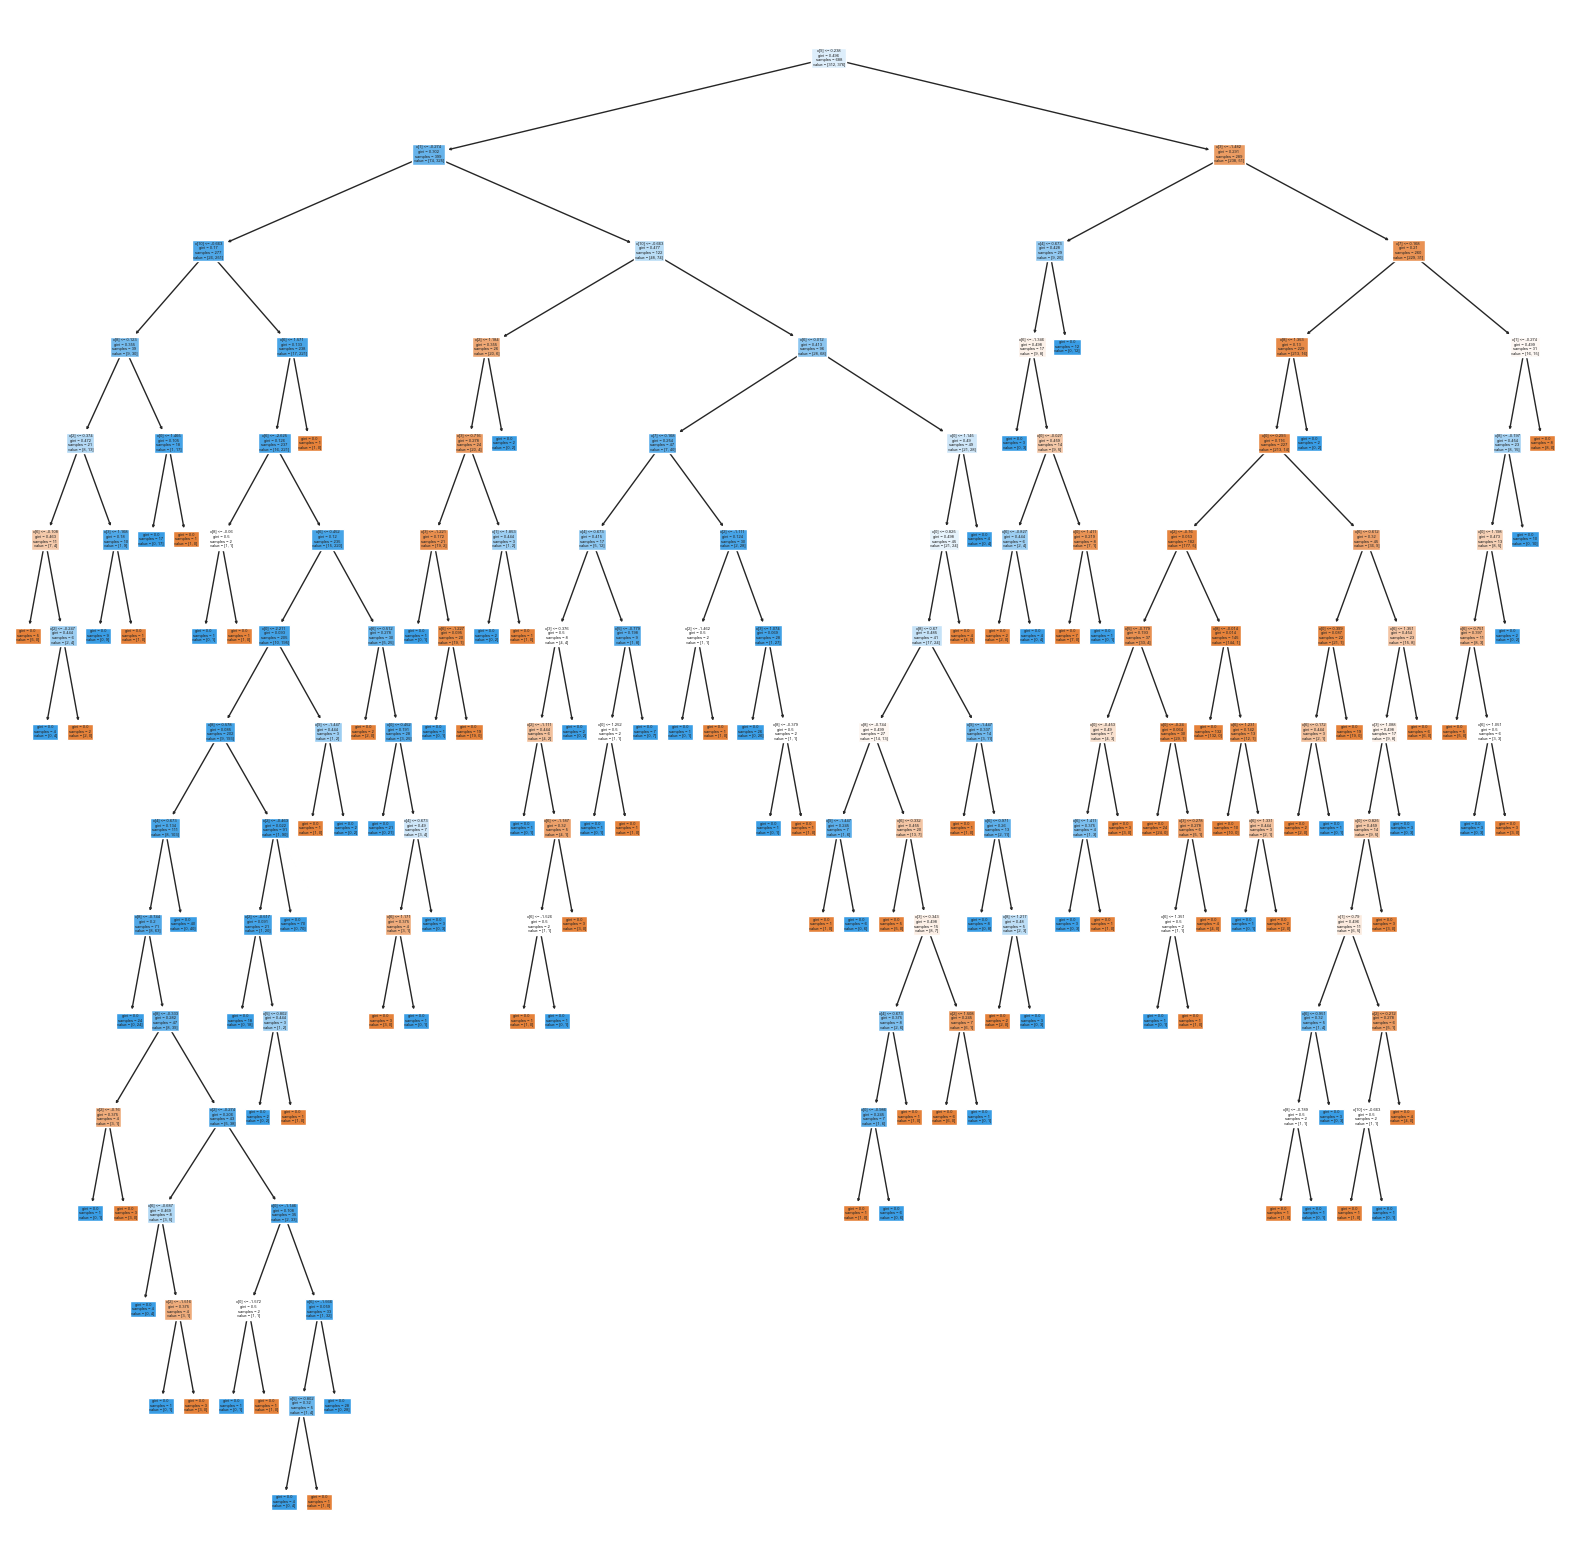

In [70]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [71]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,10,1),
             "min_samples_split":range(2,5 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
             }

In [72]:
grid_ccp = GridSearchCV(estimator=dt_model,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [73]:
grid_ccp.fit(X_train_scaled,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.25934579, 0.10056759, 0.73162977, 0.8023099 , 0.92528359,
       0.42263545, 0.01146363, 0.68251694, 0.64721411, 0.40589453,
       0.5381114 , 0.24518212, 0.18990166, 0.66348566, 0.46914974,
       0.29709339, 0.67442708, 0.38351595, 0.35050818, 0.92742737]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']})

In [74]:
grid_ccp.best_params_

{'ccp_alpha': 0.011463627779640273,
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [97]:
dt_model_best = DecisionTreeClassifier(criterion='entropy' , max_depth=7 ,min_samples_leaf=2 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [98]:
dt_model_best.fit(X_train_scaled,Y_train)
Y_pred_dt = dt_model_best.predict(X_test_scaled)

In [99]:
Y_pred_train_dt = dt_model_best.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_dt)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_dt)}")
cl_rp_dt= (classification_report(Y_test,Y_pred_dt))
print(cl_rp_dt)
cm_dt = confusion_matrix(Y_test,Y_pred_dt)
print(cm_dt)

Training accuracy : 0.8546511627906976
Testing accuracy  : 0.8434782608695652
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        98
           1       0.86      0.87      0.86       132

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230

[[ 79  19]
 [ 17 115]]


In [78]:
# over fitting and accuracy has improved then before.

In [79]:
rf_model = RandomForestClassifier()

In [80]:
rf_model.fit(X_train_scaled,Y_train)

RandomForestClassifier()

In [82]:
Y_pred_rf = rf_model.predict(X_test_scaled)
Y_pred_train_rf = rf_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_rf)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_rf)}")
cl_rf=classification_report(Y_test,Y_pred_rf)
print(cl_rf)
cm_rf = confusion_matrix(Y_test,Y_pred_rf)
print(cm_rf)

Training accuracy : 1.0
Testing accuracy  : 0.8695652173913043
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

[[ 86  12]
 [ 18 114]]


accuracy has increased quiet good. but it seems to have overfitting during training.

In [118]:
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]


In [119]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [121]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf_model, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [123]:
rf_grid.fit(X_train_scaled,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [124]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 120}

In [127]:
rf_model = RandomForestClassifier(max_depth= 8, max_features= 0.2, max_samples= 0.5, n_estimators= 120)

In [128]:
rf_model.fit(X_train_scaled,Y_train)

RandomForestClassifier(max_depth=8, max_features=0.2, max_samples=0.5,
                       n_estimators=120)

In [129]:
Y_pred_rf = rf_model.predict(X_test_scaled)
Y_pred_train_rf = rf_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_rf)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_rf)}")
cl_rf=classification_report(Y_test,Y_pred_rf)
print(cl_rf)
cm_rf = confusion_matrix(Y_test,Y_pred_rf)
print(cm_rf)

Training accuracy : 0.9433139534883721
Testing accuracy  : 0.8826086956521739
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        98
           1       0.90      0.89      0.90       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

[[ 85  13]
 [ 14 118]]


In [130]:
#model f1 and recall has increased alot after hyper parameter tuning.

In [131]:
ab_model=AdaBoostClassifier()

In [132]:
ab_model.fit(X_train_scaled,Y_train)

AdaBoostClassifier()

In [133]:
Y_pred_ab = ab_model.predict(X_test_scaled)
Y_pred_train_ab = ab_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_ab)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_ab)}")
cl_ab=classification_report(Y_test,Y_pred_ab)
print(cl_ab)
cm_ab = confusion_matrix(Y_test,Y_pred_ab)
print(cm_ab)

Training accuracy : 0.8808139534883721
Testing accuracy  : 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        98
           1       0.91      0.82      0.86       132

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230

[[ 87  11]
 [ 24 108]]


overfitting and accuracy has been increased for possitive heart disease. till now this is the best model.

In [86]:
bc_model=BaggingClassifier()

In [87]:
bc_model.fit(X_train_scaled,Y_train)

BaggingClassifier()

In [88]:
Y_pred_bc = bc_model.predict(X_test_scaled)
Y_pred_train_bc = bc_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_bc)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_bc)}")
cl_bc=classification_report(Y_test,Y_pred_bc)
print(cl_bc)
cm_bc = confusion_matrix(Y_test,Y_pred_bc)
print(cm_bc)

Training accuracy : 0.9825581395348837
Testing accuracy  : 0.8478260869565217
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        98
           1       0.92      0.80      0.86       132

    accuracy                           0.85       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.85      0.85       230

[[ 89   9]
 [ 26 106]]


this is still less efficient model then adaboost model.

In [89]:
gb_model  = GradientBoostingClassifier()

In [90]:
gb_model.fit(X_train_scaled,Y_train)

GradientBoostingClassifier()

In [91]:
Y_pred_gb = gb_model.predict(X_test_scaled)
Y_pred_train_gb = gb_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_gb)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_gb)}")
cl_gb=classification_report(Y_test,Y_pred_gb)
print(cl_gb)
cm_gb = confusion_matrix(Y_test,Y_pred_gb)
print(cm_gb)

Training accuracy : 0.9433139534883721
Testing accuracy  : 0.8608695652173913
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        98
           1       0.92      0.83      0.87       132

    accuracy                           0.86       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.86      0.86       230

[[ 88  10]
 [ 22 110]]


In [92]:
xgb_model = xgboost.XGBClassifier()
xgb_model.fit(X_train_scaled,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
Y_pred_xgb = xgb_model.predict(X_test_scaled)
Y_pred_train_xgb = xgb_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_xgb)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_xgb)}")
cl_xgb=classification_report(Y_test,Y_pred_xgb)
print(cl_xgb)
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)
print(cm_xgb)

Training accuracy : 1.0
Testing accuracy  : 0.8782608695652174
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        98
           1       0.92      0.86      0.89       132

    accuracy                           0.88       230
   macro avg       0.87      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

[[ 88  10]
 [ 18 114]]


this model seems to be more efficient then ada boost

In [94]:
from sklearn.svm import SVC
svc_model=SVC()

In [95]:
svc_model.fit(X_train_scaled,Y_train)

SVC()

In [96]:
Y_pred_svc = svc_model.predict(X_test_scaled)
Y_pred_train_svc = svc_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_svc)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_svc)}")
cl_svc=classification_report(Y_test,Y_pred_svc)
print(cl_svc)
cm_svc = confusion_matrix(Y_test,Y_pred_svc)
print(cm_svc)

Training accuracy : 0.8968023255813954
Testing accuracy  : 0.8695652173913043
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        98
           1       0.89      0.88      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

[[ 84  14]
 [ 16 116]]


In [100]:
# svc seems to be best. now we can do hyper parameter tuning with this.

In [101]:
svc_model=SVC(kernel="linear")

In [102]:
svc_model.fit(X_train_scaled,Y_train)

SVC(kernel='linear')

In [103]:
Y_pred_svc = svc_model.predict(X_test_scaled)
Y_pred_train_svc = svc_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_svc)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_svc)}")
cl_svc=classification_report(Y_test,Y_pred_svc)
print(cl_svc)
cm_svc = confusion_matrix(Y_test,Y_pred_svc)
print(cm_svc)

Training accuracy : 0.8633720930232558
Testing accuracy  : 0.8565217391304348
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        98
           1       0.90      0.85      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

[[ 85  13]
 [ 20 112]]


In [104]:
#recall and f1 has reduced with linear kernel.

In [105]:
svc_model=SVC(kernel="poly")

In [106]:
svc_model.fit(X_train_scaled,Y_train)

SVC(kernel='poly')

In [107]:
Y_pred_svc = svc_model.predict(X_test_scaled)
Y_pred_train_svc = svc_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_svc)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_svc)}")
cl_svc=classification_report(Y_test,Y_pred_svc)
print(cl_svc)
cm_svc = confusion_matrix(Y_test,Y_pred_svc)
print(cm_svc)

Training accuracy : 0.9084302325581395
Testing accuracy  : 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        98
           1       0.91      0.81      0.86       132

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.86      0.85      0.85       230

[[ 88  10]
 [ 25 107]]


In [108]:
#still recall and f1 score is not good.

In [109]:
svc_model=SVC(kernel="sigmoid")

In [110]:
svc_model.fit(X_train_scaled,Y_train)

SVC(kernel='sigmoid')

In [111]:
Y_pred_svc = svc_model.predict(X_test_scaled)
Y_pred_train_svc = svc_model.predict(X_train_scaled)
print(f"Training accuracy : {accuracy_score(Y_train,Y_pred_train_svc)}")
print(f"Testing accuracy  : {accuracy_score(Y_test,Y_pred_svc)}")
cl_svc=classification_report(Y_test,Y_pred_svc)
print(cl_svc)
cm_svc = confusion_matrix(Y_test,Y_pred_svc)
print(cm_svc)

Training accuracy : 0.7979651162790697
Testing accuracy  : 0.8217391304347826
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        98
           1       0.87      0.81      0.84       132

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.83      0.82      0.82       230

[[ 82  16]
 [ 25 107]]


In [112]:
#in SVC best is rbf kernel.

In [114]:
# trying lazy predictor also for checking best ML

In [116]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.67it/s]

[LightGBM] [Info] Number of positive: 376, number of negative: 312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 688, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546512 -> initscore=0.186586
[LightGBM] [Info] Start training from score 0.186586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [117]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.89               0.89     0.89      0.89   
LGBMClassifier                     0.88               0.88     0.88      0.88   
RandomForestClassifier             0.88               0.88     0.88      0.88   
XGBClassifier                      0.88               0.88     0.88      0.88   
BaggingClassifier                  0.87               0.87     0.87      0.87   
SVC                                0.87               0.87     0.87      0.87   
LogisticRegression                 0.86               0.86     0.86      0.86   
QuadraticDiscriminantAnalysis      0.86               0.86     0.86      0.86   
GaussianNB                         0.86               0.86     0.86      0.86   
KNeighborsClassifier               0.86               0.86     0.86      0.86   
CalibratedClassifierCV      

In [134]:
#out of all machine learning algorithm for this data set , best is random forest with tuned hyperparameter.